# Notebook 4: Kingdom Classification

In [2]:
# imports
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from pandas import MultiIndex, Int16Dtype
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     train_test_split)
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, f1_score, plot_confusion_matrix,
                             plot_roc_curve, precision_score, recall_score,
                             roc_auc_score, roc_curve)
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from numpy import hstack, unique, vstack, where
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
import warnings
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats

%matplotlib inline


# warnings.filterwarnings("ignore")
np.random.seed(123)


# warnings.filterwarnings("ignore")
np.random.seed(123)


# Plan for Modeling:

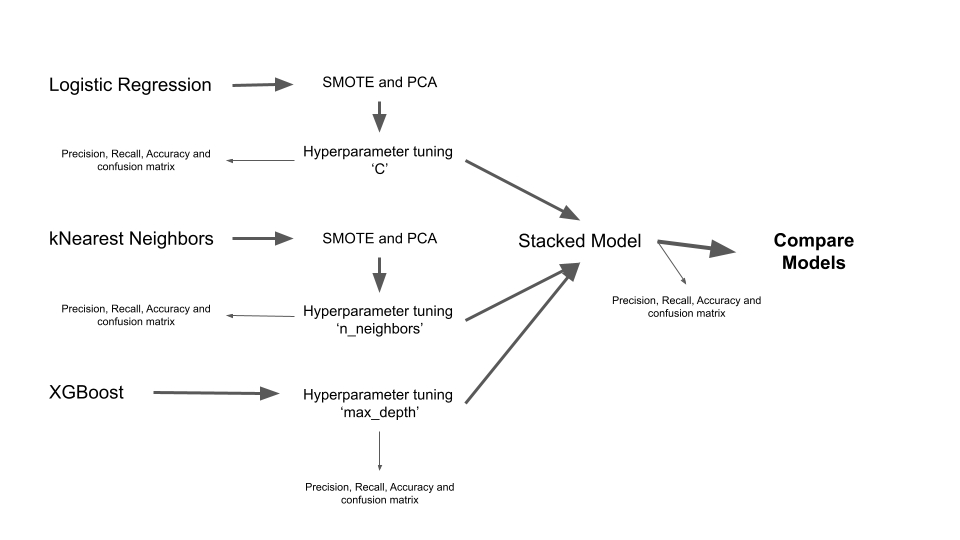

In [3]:
# you can find this image in the zip folder
Image('../notebooks/modelling_plan.png')
# change the path accordingly.


In [4]:
# import the data

codon = joblib.load('../data/codon_after_eda.pkl')


In [5]:
sns.set_theme(style="dark")


In [6]:
codon


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,virus,0,100217,7.598900,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,virus,0,100220,7.296413,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,virus,0,100755,8.489411,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,virus,0,100880,7.557995,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,virus,0,100887,10.035918,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,vertebrate,0,9601,7.001246,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,vertebrate,1,9601,7.634337,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,vertebrate,1,9602,7.430707,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,vertebrate,0,9606,17.520819,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [7]:
codon.shape


(12964, 69)

<AxesSubplot:>

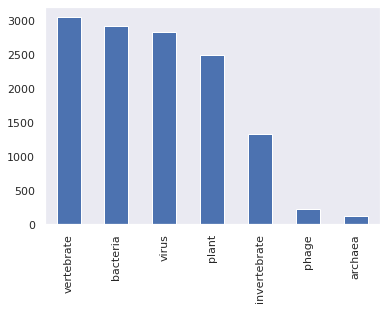

In [8]:
codon['Kingdom'].value_counts().plot(kind='bar')


<AxesSubplot:>

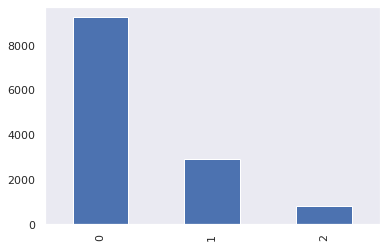

In [9]:
codon['DNAtype'].value_counts().plot(kind='bar')


In [10]:
codon.describe()


,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,...,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000
mean,0.349506,130573.312635,8.513725,0.024712,0.023460,0.020553,0.014084,0.017822,0.018338,0.019082,...,0.005441,0.009918,0.006431,0.024155,0.021198,0.028260,0.021707,0.001640,0.000591,0.006201
std,0.594362,124773.296344,1.647012,0.017437,0.011608,0.020605,0.009264,0.010602,0.014580,0.024299,...,0.006603,0.008575,0.006399,0.013844,0.013033,0.014348,0.015024,0.001788,0.000883,0.010363
min,0.000000,7.000000,6.908755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28897.000000,7.382591,0.013910,0.015397,0.005600,0.007090,0.010880,0.007860,0.005310,...,0.001220,0.001678,0.001160,0.012307,0.011890,0.017340,0.009747,0.000560,0.000000,0.000410
50%,0.000000,82005.000000,7.984803,0.021720,0.021920,0.015225,0.013345,0.016130,0.014600,0.009690,...,0.003520,0.009260,0.004550,0.025365,0.019105,0.026035,0.020585,0.001370,0.000420,0.001130
75%,1.000000,223048.250000,9.117731,0.031232,0.029250,0.029370,0.019790,0.022730,0.025160,0.017212,...,0.007110,0.015893,0.010300,0.034200,0.027692,0.036790,0.031160,0.002370,0.000830,0.002920
max,2.000000,465364.000000,17.520819,0.217300,0.091690,0.151330,0.101190,0.089780,0.100350,0.163920,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


---

In [11]:
# assigning the target and features y and X

X = codon.drop(columns=['Kingdom', 'DNAtype',
               'SpeciesName', 'SpeciesID'])  # features
y = codon['Kingdom']  # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2)


# Vanilla Models:

Plan:

- Pipeline for kNearest Neighbors, Logistic Regression, Decision Tree
- Gridsearch and score comparison of the models

In [12]:
# Vanilla models pipeline


estimators = [('scaler', StandardScaler()), ('model', KNeighborsClassifier())]

pipe = Pipeline(estimators)

parameters = [{'model': [KNeighborsClassifier()],
               'scaler': [StandardScaler(), MinMaxScaler()]},


              {'model': [LogisticRegression(random_state=123, max_iter=10000, multi_class='multinomial')],
               'scaler': [StandardScaler(), MinMaxScaler(), None]},


              {'model': [DecisionTreeClassifier()],
               'scaler': [None]}]


In [13]:
# Gridsearch for vanilla
gridsearch = GridSearchCV(pipe, parameters, cv=5)

# fit to train data
fittedgrid = gridsearch.fit(X_train, y_train)


In [14]:
results_df = pd.DataFrame.from_dict(gridsearch.cv_results_, orient='columns')
results_df.sort_values(by='mean_test_score', ascending=False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023362,0.003431,0.092173,0.031071,KNeighborsClassifier(),StandardScaler(),"{'model': KNeighborsClassifier(), 'scaler': St...",0.932048,0.928640,0.934426,0.935873,0.932498,0.932697,0.002449,1
1,0.027736,0.007011,0.093510,0.020527,KNeighborsClassifier(),MinMaxScaler(),"{'model': KNeighborsClassifier(), 'scaler': Mi...",0.927711,0.928640,0.932980,0.926712,0.927676,0.928744,0.002204,2
2,0.360197,0.054948,0.002892,0.000261,"LogisticRegression(max_iter=10000, multi_class...",StandardScaler(),"{'model': LogisticRegression(max_iter=10000, m...",0.871325,0.878496,0.889103,0.891996,0.887175,0.883619,0.007619,3
3,0.257153,0.008573,0.002737,0.000071,"LogisticRegression(max_iter=10000, multi_class...",MinMaxScaler(),"{'model': LogisticRegression(max_iter=10000, m...",0.851084,0.856798,0.869817,0.863067,0.869335,0.862020,0.007242,4
5,0.451513,0.022752,0.002554,0.000098,DecisionTreeClassifier(),None,"{'model': DecisionTreeClassifier(), 'scaler': ...",0.800964,0.785439,0.802314,0.793635,0.802314,0.796933,0.006590,5
4,0.699799,0.070165,0.002356,0.000045,"LogisticRegression(max_iter=10000, multi_class...",None,"{'model': LogisticRegression(max_iter=10000, m...",0.697349,0.668274,0.702989,0.683221,0.693828,0.689132,0.012261,6


Running vanilla models shows that without any hyperparameter tuning, class balancing, or PCA, the classification model for kNearest Neighbors performs the best with an average accuracy score of 93%.
I am hoping assuming that with dimensionality reduction and balancing the classes these scores can be improved.

## Logistic Regression:

Distributions before and after SMOTE upsampling:


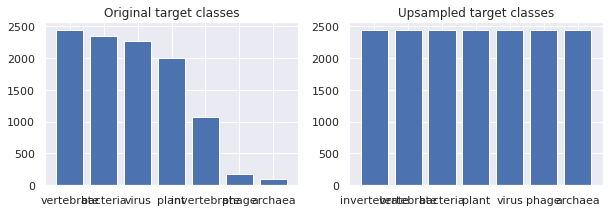

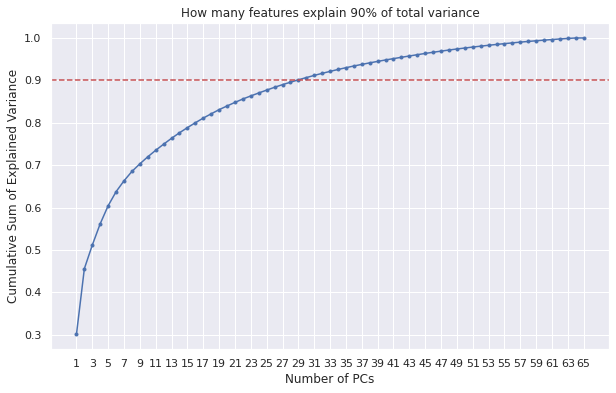

In [15]:
sns.set_theme(style="darkgrid")
# Using SMOTE to balance the classes:

sm = SMOTE(random_state=123)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Plotting distributions
print('Distributions before and after SMOTE upsampling:')
plt.subplots(1, 2, figsize=(10, 3))

# Plot the original data
plt.subplot(1, 2, 1)
plt.bar(y_train.value_counts().index, y_train.value_counts())
plt.title('Original target classes')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6])

# Plot the upsampled data
plt.subplot(1, 2, 2)
plt.bar(y_train_sm.value_counts().index, y_train_sm.value_counts())
plt.title('Upsampled target classes')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6])
plt.show()

print('==============================================================================')

# scaling data for PCA tranform
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)  # scaling the upsampled set
X_test_scaled = scaler.transform(X_test)

# PCA dimensionality reduction
pca = PCA()

# fit transform train set and transform test set
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)
# to see the number of features that account for the highest variance
explained_variance = pca.explained_variance_ratio_

# cumulative sum of the explained variance
cumulative_sum = np.cumsum(explained_variance)

# plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X_train.columns)+1), cumulative_sum, marker='.')
plt.axhline(0.9, c='r', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.xticks(range(1, len(X_train.columns)+1, 2))
plt.title("How many features explain 90% of total variance")
plt.show()


In [16]:
# setting n_components and refitting a PCA

pca_0 = PCA(n_components=27)

# fit transform train set and transform test set
X_train_PCA_0 = pca_0.fit_transform(X_train_scaled)
X_test_PCA_0 = pca_0.transform(X_test_scaled)


In [17]:
# regularisation:

c_params = [0.0001, 0.001, 0.01, 0.1, 1, 10]

train_accuracies = []
test_accuracies = []

for c in c_params:
    log_reg = LogisticRegression(C=c, max_iter=10000, random_state=123)

    log_reg.fit(X_train_PCA_0, y_train_sm)

    train_accuracies.append(log_reg.score(X_train_PCA_0, y_train_sm))
    test_accuracies.append(log_reg.score(X_test_PCA_0, y_test))


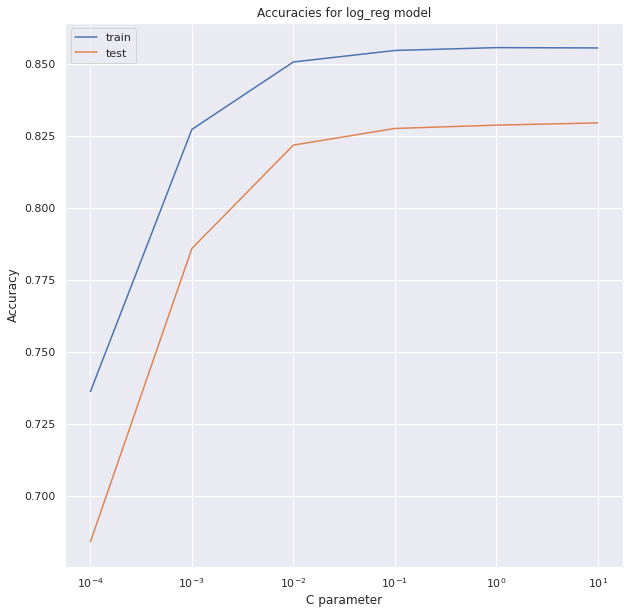

In [18]:
plt.figure(figsize=(10, 10))
plt.plot(c_params, train_accuracies, label='train')
plt.plot(c_params, test_accuracies, label='test')
plt.xscale('log')
plt.legend()
plt.title('Accuracies for log_reg model')
plt.xlabel('C parameter')
plt.ylabel('Accuracy')
plt.show()


In [19]:
# For C =0.01

log_reg_0 = LogisticRegression(C=0.01, max_iter=10000, random_state=123)

log_reg_0.fit(X_train_PCA_0, y_train_sm)

print(log_reg_0.score(X_train_PCA_0, y_train_sm))
print(log_reg_0.score(X_test_PCA_0, y_test))


0.8506893517160458
0.8218279984573853


              precision    recall  f1-score   support

     archaea       0.41      0.92      0.57        25
    bacteria       0.93      0.83      0.88       584
invertebrate       0.61      0.66      0.63       267
       phage       0.30      0.82      0.44        44
       plant       0.81      0.74      0.77       498
  vertebrate       0.95      0.95      0.95       609
       virus       0.85      0.83      0.84       566

    accuracy                           0.82      2593
   macro avg       0.70      0.82      0.73      2593
weighted avg       0.85      0.82      0.83      2593

Logistic Regression model AUC score
roc_auc_score: 0.976


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Predicted vertebrate,Predicted bacteria,Predicted virus,Predicted plant,Predicted invertebrate,Predicted phage,Predicted archaea
True vertebrate,23,2,0,0,0,0,0
True bacteria,24,483,5,58,7,2,5
True virus,2,7,176,1,40,9,32
True plant,3,5,0,36,0,0,0
True invertebrate,1,14,45,22,367,14,35
True phage,0,0,19,0,2,576,12
True archaea,3,6,43,3,36,5,470


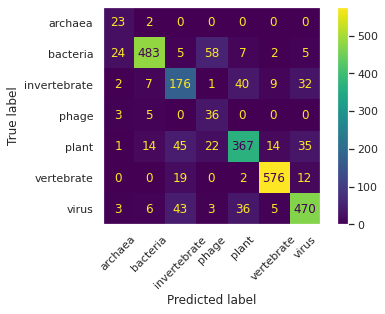

In [20]:
sns.set_theme(style="dark")
y_predicted = log_reg_0.predict(X_test_PCA_0)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_predicted)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted vertebrate", "Predicted bacteria", "Predicted virus",
             "Predicted plant", "Predicted invertebrate", "Predicted phage", "Predicted archaea"],
    index=["True vertebrate", "True bacteria", "True virus", "True plant", "True invertebrate", "True phage", "True archaea"])


plot_confusion_matrix(log_reg_0, X_test_PCA_0, y_test)
plt.xticks(rotation=45)

print('==========================================================')

# Precision, recall, and F1
class_report_log_0 = classification_report(y_test, y_predicted)
print(class_report_log_0)

print('==========================================================')

# AUC score
y_proba_train = log_reg_0.predict_proba(X_train_PCA_0)
auc_train = np.round(roc_auc_score(
    y_train_sm, y_proba_train, multi_class='ovo'), 3)
print('Logistic Regression model AUC score')
print(f'roc_auc_score: {auc_train}')
print('==========================================================')

cf_df


- **Interpreting Results for Logistic Regression**

Logistic Regression model classifies using a logistic function, where the output is either 1 or 0, this is usually for binomial clasification.
However, and as I assumed, Logistic regression model did not perform adequately in classifying multiclass target, with an R2 score of 0.85 for train data, and 0.82 for test data. 

I balanced the classes using SMOTE, and then performed a PCA fit on the train and transformed the test set.
PCA reduces dimensionality to reduce overfitting, and use fewer features from the dataset. According to the graph above, the number of number of components needed to explain 90% of the variance is 29.

Furthermore, hyperparameter tuning showed that a higher penalty of C=0.01 was the appropriate value to achieve a higher accuracy score.

The model is very good at classifying the vertebrate class which has a similar precision and recall score.
The model performed well enough on the bacteria and virus classes.
For the phage and archaea classes the model has:
- high recall: the overall proportion of true positives over predicted results is high, the model classified the majority of these classes correctly
- low precision: the proportion of true positives over actual results, the model struggled to classify the majority of the phage class and only correctly classifying 29% correctly.

The AUC score of 0.977 shows that the model performed well overall at distinguishing between the classes.

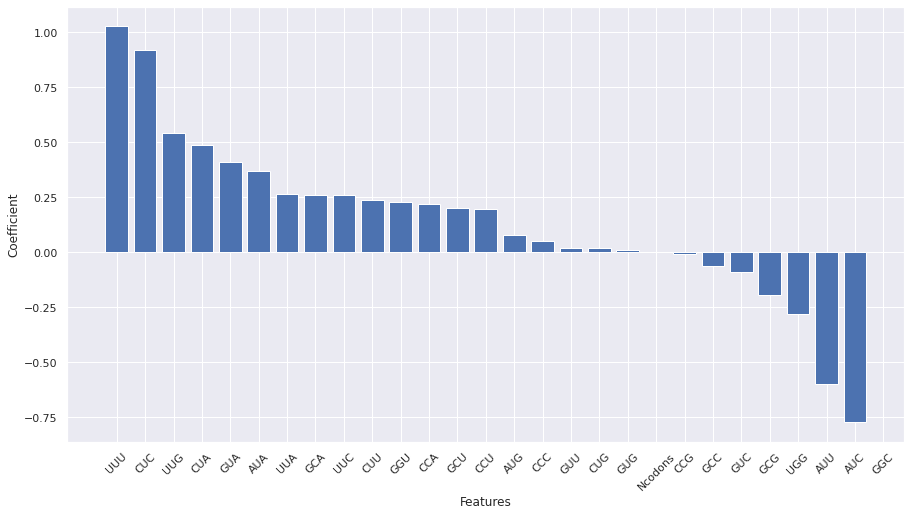

In [21]:
# Feature importance
# 5 to select coefficients for the vertebrate class.
coefs = pd.DataFrame(log_reg_0.coef_[5], columns=['coefficients'])
coefs

feat_names = pd.DataFrame(X_train.columns, columns=['feature_names'])
feat_names

feat_coefs = pd.concat([feat_names, coefs], axis=1, ignore_index=True)

feat_coefs = feat_coefs.sort_values(
    by=1, ascending=False).set_index(0).head(29)

# plotting coefficients
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 8))
plt.bar(feat_coefs.index, feat_coefs[1])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()


Logistic Regression adds coefficients (beta1) to each feature, the above bar chart shows the coefficients for the 29 features for the `vertebrate class`. the coefficients represent the log odds of a feature change effecting the outcome.

for the `log_reg_0` model, the above barchart shows that with increase frequency of `UUU` and `CUC` for example, there is an increased odds of `vertebrate` classification.
The bar grapgh shows how the model made the decision of classification, in terms of these features.


## kNearest Neighbors model:

In [22]:
# using the already scaled and PCA tranformed sets from previous model

# Determining the ideal n_neighbors value:

n_neighbors = range(1, 100, 2)

train_accuracies_0 = []
test_accuracies_0 = []

for n in n_neighbors:
    KNN_model = KNeighborsClassifier(n_neighbors=n)
    KNN_model.fit(X_train_PCA_0, y_train_sm)

    train_accuracies_0.append(KNN_model.score(X_train_PCA_0, y_train_sm))
    test_accuracies_0.append(KNN_model.score(X_test_PCA_0, y_test))


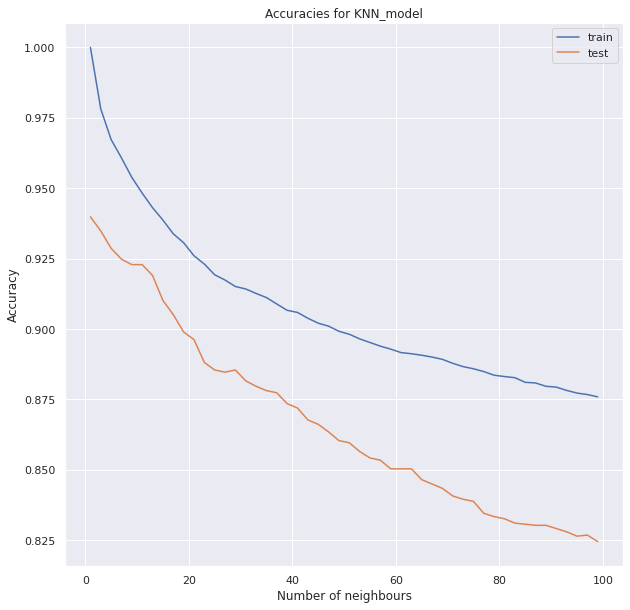

In [23]:
plt.figure(figsize=(10, 10))
plt.plot(n_neighbors, train_accuracies_0, label='train')
plt.plot(n_neighbors, test_accuracies_0, label='test')
plt.legend()
plt.title('Accuracies for KNN_model')
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show()


In [24]:
Knn_accuracies_df = pd.DataFrame({'number of neighbors': n_neighbors,
                                 'Train scores': train_accuracies_0, 'Test scores': test_accuracies_0})
Knn_accuracies_df.sort_values(by='Test scores', ascending=False).head(5)


,number of neighbors,Train scores,Test scores
0,1,1.000000,0.939838
1,3,0.978117,0.934825
2,5,0.967263,0.928654
3,7,0.960751,0.924798
4,9,0.953828,0.922869


In [25]:
KNN_model_0 = KNeighborsClassifier(n_neighbors=1)
KNN_model_0.fit(X_train_PCA_0, y_train_sm)

print(f'KNN model train score: {KNN_model_0.score(X_train_PCA_0, y_train_sm)}')
print(
    f'KNN model test score: {KNN_model_0.score(X_test_PCA_0, y_test).round(3)}')


KNN model train score: 1.0
KNN model test score: 0.94


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

     archaea       0.70      0.84      0.76        25
    bacteria       0.97      0.95      0.96       584
invertebrate       0.84      0.87      0.86       267
       phage       0.61      0.82      0.70        44
       plant       0.94      0.92      0.93       498
  vertebrate       0.98      0.98      0.98       609
       virus       0.97      0.95      0.96       566

    accuracy                           0.94      2593
   macro avg       0.86      0.90      0.88      2593
weighted avg       0.94      0.94      0.94      2593

KNN model AUC score
roc_auc_score: 1.0


,Predicted vrt,Predicted bct,Predicted vrl,Predicted pln,Predicted inv,Predicted phg,Predicted arc
True vrt,21,3,1,0,0,0,0
True bct,5,554,3,17,4,0,1
True vrl,1,3,233,1,11,7,11
True pln,3,4,0,36,1,0,0
True inv,0,8,17,5,460,4,4
True phg,0,1,11,0,2,595,0
True arc,0,1,11,0,13,3,538


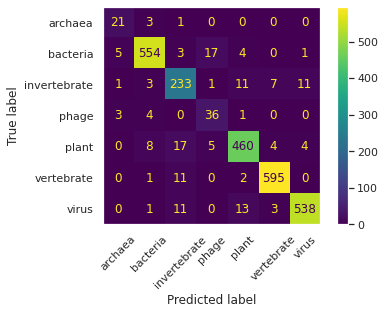

In [26]:
y_predicted_0 = KNN_model_0.predict(X_test_PCA_0)

# Generate confusion matrix
cf_matrix_0 = confusion_matrix(y_test, y_predicted_0)

# label rows and columns
cf_df_0 = pd.DataFrame(
    cf_matrix_0,
    columns=["Predicted vrt", "Predicted bct", "Predicted vrl",
             "Predicted pln", "Predicted inv", "Predicted phg", "Predicted arc"],
    index=["True vrt", "True bct", "True vrl", "True pln", "True inv", "True phg", "True arc"])

sns.set_theme(style="dark")
plot_confusion_matrix(KNN_model_0, X_test_PCA_0, y_test)
plt.xticks(rotation=45)

print('==========================================================')

class_report_knn_0 = classification_report(y_test, y_predicted_0)
print(class_report_knn_0)

print('==========================================================')

# AUC score
y_proba_train_0 = KNN_model_0.predict_proba(X_train_PCA_0)
auc_train_0 = np.round(roc_auc_score(
    y_train_sm, y_proba_train_0, multi_class='ovo'), 3)
print('KNN model AUC score')
print(f'roc_auc_score: {auc_train_0}')
print('==========================================================')

cf_df_0


- **Interpreting Results for kNearest Neighbors**:

kNearest Neighbor model classifies by determining the distances between the data points: data points closest to each other are classified as being from the same class, depending on the number of nearest neighbors selected.
Because KNN usese distances between data points, I scaled the data performed PCA and used the SMOTE transformed data.

The KNN_model_0 performed very well, with an accuracy score of 1.0 for the training data and 0.94 for the test data, for a value of n_neighbors = 1.

The model performed better on all of the classes compared with log_reg_0 (logistic Regression) model, with improvement in the precision and recall scores overall.
However, the KNN model still underperformed on the phage and archaea classes with F1 scores of 0.69 and 0.76 respectively.


Overall the KNN_model_0 performed well on distinguising between the classes with an AUC score of 1.0.

## XGBoost model:

I will need to label encode the `Kingdom` column so the classes are integers instead of strings, the XGBoost model only takes numerical values as its input. 

I will use the LabelEncoder() to fit to the training data and transform the test data.

In [27]:
# Instantiate the label encoder
label_enc = LabelEncoder()

# Fit and transform the y_train, and transform the y_test
y_train_enc = label_enc.fit_transform(y_train)
y_test_enc = label_enc.transform(y_test)


In [28]:
maxdepth = range(1, 10)

train_accuracies_1 = []
test_accuracies_1 = []

for d in maxdepth:
    XGB_model_ = XGBClassifier(max_depth=d, use_label_encoder=False)
    XGB_model_.fit(X_train, y_train_enc)

    train_accuracies_1.append(XGB_model_.score(X_train, y_train_enc))
    test_accuracies_1.append(XGB_model_.score(X_test, y_test_enc))


,max Depth,Train scores,Test scores
5,6,1.000000,0.949865
3,4,1.000000,0.949479
8,9,1.000000,0.949479
4,5,1.000000,0.947937
6,7,1.000000,0.947937
7,8,1.000000,0.947165
2,3,0.995757,0.941381
1,2,0.962492,0.917084
0,1,0.866358,0.848438


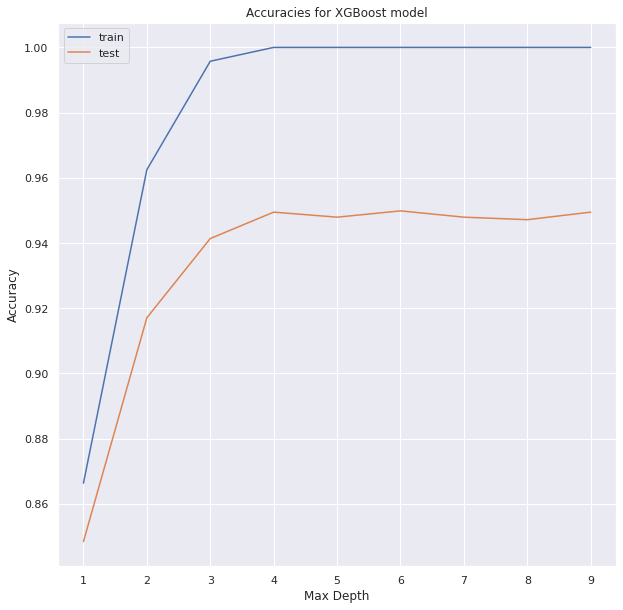

In [29]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 10))
plt.plot(maxdepth, train_accuracies_1, label='train')
plt.plot(maxdepth, test_accuracies_1, label='test')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracies for XGBoost model')


XGB_accuracies_df = pd.DataFrame(
    {'max Depth': maxdepth, 'Train scores': train_accuracies_1, 'Test scores': test_accuracies_1})
XGB_accuracies_df.sort_values(by='Test scores', ascending=False).head(10)


In [30]:
# XGBoost with max+depth = 4

XGB_model_0 = XGBClassifier(max_depth=4, use_label_encoder=False)
XGB_model_0.fit(X_train, y_train_enc)

print(
    f'XGBoost train accuracy: {XGB_model_0.score(X_train, y_train_enc).round(3)}')
print(
    f'XGBoost test accuracy: {XGB_model_0.score(X_test, y_test_enc).round(3)}')


XGBoost train accuracy: 1.0
XGBoost test accuracy: 0.949


              precision    recall  f1-score   support

           0       0.81      0.68      0.74        25
           1       0.94      0.98      0.96       584
           2       0.93      0.84      0.88       267
           3       0.90      0.64      0.75        44
           4       0.93      0.94      0.94       498
           5       0.99      0.99      0.99       609
           6       0.95      0.97      0.96       566

    accuracy                           0.95      2593
   macro avg       0.92      0.86      0.89      2593
weighted avg       0.95      0.95      0.95      2593



/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


XGBoost model AUC score
roc_auc_score: 1.0


,Predicted vrt,Predicted bct,Predicted vrl,Predicted pln,Predicted inv,Predicted phg,Predicted arc
True vrt,17,6,1,0,0,0,1
True bct,1,574,1,2,2,0,4
True vrl,0,4,224,0,20,4,15
True pln,2,12,0,28,1,0,1
True inv,0,13,5,1,469,2,8
True phg,0,0,6,0,0,602,1
True arc,1,0,5,0,10,2,548


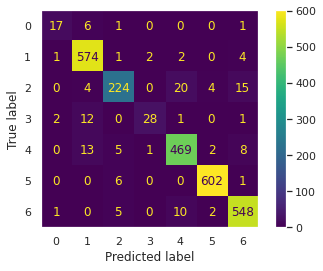

In [31]:
y_predicted_1 = XGB_model_0.predict(X_test)

# Generate confusion matrix
cf_matrix_1 = confusion_matrix(y_test_enc, y_predicted_1)

# label rows and columns
cf_df_1 = pd.DataFrame(
    cf_matrix_1,
    columns=["Predicted vrt", "Predicted bct", "Predicted vrl",
             "Predicted pln", "Predicted inv", "Predicted phg", "Predicted arc"],
    index=["True vrt", "True bct", "True vrl", "True pln", "True inv", "True phg", "True arc"])

print('==========================================================')

sns.set_theme(style="dark")
plot_confusion_matrix(XGB_model_0, X_test, y_test_enc)

print('==========================================================')


# Precision Recall and F1 scores
class_report_xgb_0 = classification_report(y_test_enc, y_predicted_1)
print(class_report_xgb_0)
print('==========================================================')

# AUC score
y_proba_train_1 = XGB_model_0.predict_proba(X_train)
auc_train_1 = np.round(roc_auc_score(
    y_train, y_proba_train_1, multi_class='ovo'), 3)
print('XGBoost model AUC score')
print(f'roc_auc_score: {auc_train_1}')
print('==========================================================')

cf_df_1


- **Interpreting Results for XGBoost model**:

XGBoost model is an ensemble model, it classifies data using decision trees in ensembles. Using max_depth as the hyperparameter, which determines the maximium depth of the trees.

For XGB_model_0 the appropriate value for max_depth was determined to be 3, this gave an accuracy score of 0.996 for training data and 0.941 for test data. There is slight overfitting here, this is a disadvantage of decision tree type classification.

I did not use the scaled, oversamples, and PCA transformed data for this model, as this is not needed.

XGB_model_0 performed better than KNN_model_0 and log_reg_0 in terms of precision for phage and archaea classes with scores of 0.83 and 0.89 respectively. Although, there is a decrease in recall score for both of these classes, meaning that this model underperformed in classifying the 

However, in terms of accuracy it is as good as KNN_model_0 in terms of accuracy, but KNN_model_0 had less overfitting on the training data.

Furthermore, this model performed well on distinguishing between the classes with an AUC score of 1.0.

<Figure size 1080x1800 with 0 Axes>

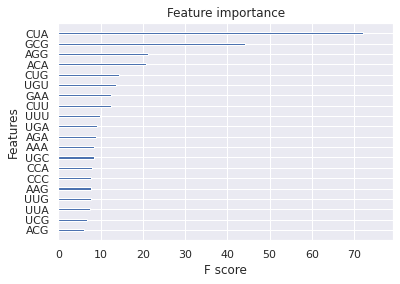

In [32]:
# plot feature importance
plt.figure(figsize=(15, 25))
plot_importance(XGB_model_0, max_num_features=20,
                importance_type='gain', show_values=False)
plt.show()


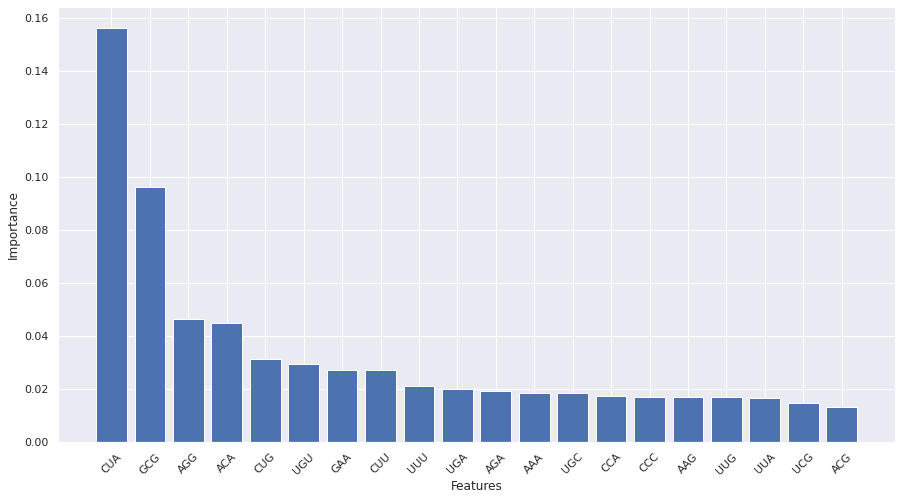

In [33]:
feat_imprt = pd.DataFrame(
    XGB_model_0.feature_importances_).sort_values(by=0, ascending=False)

feat_names_0 = pd.DataFrame(X_train.columns, columns=['feature_names'])

# join inner because the ndarray lengths are different
feat_importance_0 = pd.concat(
    [feat_names_0, feat_imprt], axis=1, ignore_index=True, join='inner')

feat_importance_0 = feat_importance_0.sort_values(
    by=1, ascending=False).set_index(0).head(20)

# plotting coefficients
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 8))
plt.bar(feat_importance_0.index, feat_imprt[0][:20])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


Feature importance for XGBoost models shows the features that the model deemed most important in making the classification decision. 

the above bar chart shows the codons importance according to `gain` metric, which is the relative contribution of each feature for each tree in the ensemble (XGBoost) model. This means that `CUA` and `GCG` having the highest values of importance were the most important in generating a prediction of the outcome classification.

## Ensemble Model

In [34]:
# We instantiate the base models, along with their names
base_models = [('KNN', KNN_model_0),
               ('XGBoost', XGB_model_0)
               ]


# building the stacked model
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression())

stacked_model.fit(X_train, y_train)


StackingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=1)),
                               ('XGBoost',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=0,
                                              gpu_id=-1,
                                              grow_policy='depthwise',
                                              importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_bin=256, max_cat_to_onehot=4,
                                              max_delta_step=0, max_depth=4,
                                              max_leaves=0, min_child_weight=1,
                                              missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=100, n_jobs=0,
                                              num_parallel_tree=1,
                                              objective='multi:softprob',
                                              predictor='auto', random_state=0,
                                              reg_alpha=0, ...))],
                   final_estimator=LogisticRegression())

In [35]:
print(
    f'Stacked model train accuracy: {stacked_model.score(X_train, y_train).round(3)}')
print(
    f'Stacked model test accuracy: {stacked_model.score(X_test, y_test).round(3)}')


Stacked model train accuracy: 1.0
Stacked model test accuracy: 0.949


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

     archaea       0.81      0.68      0.74        25
    bacteria       0.94      0.98      0.96       584
invertebrate       0.91      0.85      0.88       267
       phage       0.90      0.64      0.75        44
       plant       0.94      0.94      0.94       498
  vertebrate       0.99      0.99      0.99       609
       virus       0.95      0.97      0.96       566

    accuracy                           0.95      2593
   macro avg       0.92      0.86      0.89      2593
weighted avg       0.95      0.95      0.95      2593

Ensemble model AUC score
roc_auc_score: 1.0


,Predicted vrt,Predicted bct,Predicted vrl,Predicted pln,Predicted inv,Predicted phg,Predicted arc
True vrt,17,6,1,0,0,0,1
True bct,1,574,1,2,3,0,3
True vrl,0,4,228,0,17,4,14
True pln,2,12,0,28,1,0,1
True inv,0,14,8,1,466,1,8
True phg,0,0,6,0,1,600,2
True arc,1,0,6,0,8,2,549


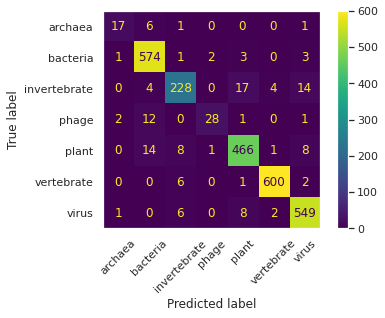

In [36]:
y_predicted_2 = stacked_model.predict(X_test)

# Generate confusion matrix
cf_matrix_2 = confusion_matrix(y_test, y_predicted_2)

# label rows and columns
cf_df_2 = pd.DataFrame(
    cf_matrix_2,
    columns=["Predicted vrt", "Predicted bct", "Predicted vrl",
             "Predicted pln", "Predicted inv", "Predicted phg", "Predicted arc"],
    index=["True vrt", "True bct", "True vrl", "True pln", "True inv", "True phg", "True arc"])

sns.set_theme(style="dark")
plot_confusion_matrix(stacked_model, X_test, y_test)
plt.xticks(rotation=45)

print('==========================================================')


# Precision Recall and F1 scores
class_report_stack_0 = classification_report(y_test, y_predicted_2)
print(class_report_stack_0)
print('==========================================================')

# AUC score
y_proba_train_2 = stacked_model.predict_proba(X_train)
auc_train_2 = np.round(roc_auc_score(
    y_train, y_proba_train_2, multi_class='ovo'), 3)
print('Ensemble model AUC score')
print(f'roc_auc_score: {auc_train_2}')
print('==========================================================')

cf_df_2


- **Interpreting Results for the sctacked (ensemble) model**:

For the ensemble or stacked model, I used the models I already trained and tuned, with the exception of the logistic regression model `log_reg_0`; I decided to exclude this model as it was the model that underperformed on classifying the target variable.

I only included `XGB_model_0` and `KNN_model_0` as base models, with a final estimator being a default Logistic Regression model. Each of the base estimators is different in the way it approaches the classification.

The ensemble model classifies by taking the outputs from both the XGBoost model and KNN model as probabilites of each class as an input, the final estimator being a logistic regression then uses logistic function to classify each class.

`stacked_model` achieved an accuracy score of 0.998 for the train data and 0.946 for the test data, suggesting slight overfitting, which makes sense as one of the base models is the XGBoost.

The stacked model did well in distinguishing between the classes with an AUC of 1.0.

# Neural Network

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Step 1. Build the model

# Create a new sequential model
model = keras.Sequential()

regularizer = keras.regularizers.l2(0.01)

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu", kernel_regularizer=regularizer))
model.add(layers.Dense(40, activation="relu", kernel_regularizer=regularizer))
model.add(layers.Dense(40, activation="relu", kernel_regularizer=regularizer))\

# Declare the output layer
model.add(layers.Dense(3, activation="softmax"))

# Compile the model
model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # Metric used to evaluate model
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, epochs=5000, verbose=0)


In [ ]:
# Evaluate the model using the test data and generate predictions
train_accuracy = history.history["sparse_categorical_accuracy"][-1]
result = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {result[1]:.4f}")

predictions = model.predict(X_test)


---

## Comparing Models:

In [37]:
cls = classification_report(y_test, y_predicted, output_dict=True)
cls_0 = classification_report(y_test, y_predicted_0, output_dict=True)
cls_1 = classification_report(y_test_enc, y_predicted_1, output_dict=True)
cls_2 = classification_report(y_test, y_predicted_2, output_dict=True)


comparison_df = pd.DataFrame({'Precision':
                             [cls['weighted avg']['precision'],
                              cls_0['weighted avg']['precision'],
                              cls_1['weighted avg']['precision'],
                              cls_2['weighted avg']['precision']],
                              'Recall':
                             [cls['weighted avg']['recall'],
                              cls_0['weighted avg']['recall'],
                              cls_1['weighted avg']['recall'],
                              cls_2['weighted avg']['recall']],
                             'F1 score':
                              [cls['weighted avg']['f1-score'],
                              cls_0['weighted avg']['f1-score'],
                               cls_1['weighted avg']['f1-score'],
                              cls_2['weighted avg']['f1-score']],
                              'Accuracy':
                              [cls['accuracy'],
                               cls_0['accuracy'],
                               cls_1['accuracy'],
                               cls_2['accuracy']],
                              'AUC score':
                              [auc_train,
                               auc_train_0,
                               auc_train_1,
                               auc_train_2]
                              },
                             index=['Logistic Regression', 'kNearest Neighbors', 'XGBoost', 'Stacked model'])

comparison_df.round(3).sort_values(by='F1 score', ascending=False)


,Precision,Recall,F1 score,Accuracy,AUC score
Stacked model,0.949,0.949,0.949,0.949,1.000
XGBoost,0.949,0.949,0.948,0.949,1.000
kNearest Neighbors,0.943,0.940,0.941,0.940,1.000
Logistic Regression,0.847,0.822,0.830,0.822,0.976


According to the `F1 score` the model that performed the best overall is the stacked model, but by not much as the KNN model did just as well.

Looking at the vanilla models performed at the beginning the accuracy score for the kNearest Neighbor performed was 93%, so I only achived an improvement of ~1.6% for the `Kingdom` classses classification.

This could be because the dataset is not complicated enough for the models to be able to learn by combining the models, that is why the stacked model isn't far off from the results of the KNN and XGBoost models.


<Figure size 1440x1800 with 0 Axes>

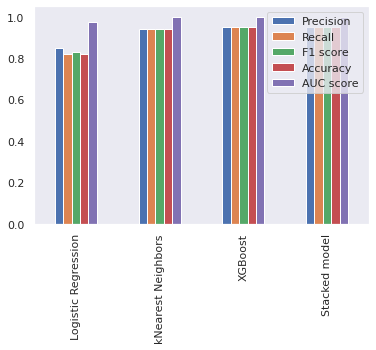

In [66]:
plt.figure(figsize=(20, 25))
comparison_df.plot(kind='bar')
plt.xticks(rotation=90)
plt.legend()
plt.show()


---

## Saving Models:

In [53]:
# Logistic Regression model
log_reg_kingdom = 'finalized_log_reg_kingdom.sav'
joblib.dump(log_reg_0, log_reg_kingdom)


# kNearest Neighbor model
knn_kingdom = 'finalized_knn_kingdom.sav'
joblib.dump(KNN_model_0, knn_kingdom)

# XGBoost model
xgboost_kingdom = 'finalized_xgboost_kingdom.sav'
joblib.dump(XGB_model_0, xgboost_kingdom)

# Ensemble model
stacked_kingdom = 'finalized_stacked_kingdom.sav'
joblib.dump(stacked_model, stacked_kingdom)


['finalized_stacked_kingdom.sav']